In [5]:
!pip install --upgrade tsfel



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from sklearn.impute import SimpleImputer
import tsfel
from tsfel.feature_extraction import time_series_features_extractor
from scipy.signal import find_peaks
import math

In [7]:
from glob import glob
from google.colab import drive
import os
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
ruta_prueba = '/content/drive/MyDrive/Tareas CDSI/Proyecto/yo_numero_subida.csv'

In [9]:
prueba = pd.read_csv(ruta_prueba)#names=["x","y","z","time"])#,skiprows=113, usecols=[1,2], header=None, na_values=['            ']) 


In [10]:
prueba

,SensorId,TimeStamp (s),FrameNumber,AccX (g),AccY (g),AccZ (g),GyroX (deg/s),GyroY (deg/s),GyroZ (deg/s),MagX (uT),...,QuatX,QuatY,QuatZ,LinAccX(g),LinAccY(g),LinAccZ(g),Pressure(kPa),Altitude(m),Temperature(degC),BatteryLevel(%)+
0,3,125.020000,0,0.037506,-0.995483,0.191315,-0.532520,-0.026250,0.015859,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70.3
1,3,125.030000,1,0.035706,-0.997986,0.186340,-0.582969,-0.182109,-0.204531,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70.3
2,3,125.040000,2,0.035675,-0.998932,0.185425,-0.670469,-0.217109,-0.187031,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70.3
3,3,125.049995,3,0.033783,-0.998993,0.187042,-0.687969,0.290391,-0.397031,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70.3
4,3,125.060000,4,0.038849,-0.999756,0.180817,-0.530469,0.587891,-0.327031,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
906,3,134.080000,906,0.014130,-0.997101,0.209930,-1.107969,-0.427109,0.705469,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70.3
907,3,134.090000,907,0.017639,-0.993286,0.213532,-1.300469,0.097891,0.530469,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70.3
908,3,134.099990,908,0.012299,-0.992767,0.209930,-1.492969,0.132891,0.495469,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70.3
909,3,134.110000,909,0.016388,-0.995148,0.208466,-1.352969,0.220391,0.477969,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70.3


In [11]:
dataframe_prueba = prueba.iloc[:,3:9] #Toma del 3 hasta el 8
dataframe_prueba

,AccX (g),AccY (g),AccZ (g),GyroX (deg/s),GyroY (deg/s),GyroZ (deg/s)
0,0.037506,-0.995483,0.191315,-0.532520,-0.026250,0.015859
1,0.035706,-0.997986,0.186340,-0.582969,-0.182109,-0.204531
2,0.035675,-0.998932,0.185425,-0.670469,-0.217109,-0.187031
3,0.033783,-0.998993,0.187042,-0.687969,0.290391,-0.397031
4,0.038849,-0.999756,0.180817,-0.530469,0.587891,-0.327031
...,...,...,...,...,...,...
906,0.014130,-0.997101,0.209930,-1.107969,-0.427109,0.705469
907,0.017639,-0.993286,0.213532,-1.300469,0.097891,0.530469
908,0.012299,-0.992767,0.209930,-1.492969,0.132891,0.495469
909,0.016388,-0.995148,0.208466,-1.352969,0.220391,0.477969


In [12]:
cfg = tsfel.get_features_by_domain()

Etiqueta

In [13]:
#Obtenemos la etiqueta
basename_p = os.path.basename(ruta_prueba)
label_p = basename_p.split("_")[2]
label_p, _  = os.path.splitext(label_p)
label_p 

'subida'

In [14]:
features = time_series_features_extractor(cfg,prueba.iloc[:,3:9])


*** Feature extraction started ***
60


<ipython-input-14-8d8a2ca1657d>:1: UserWarning: Using default sampling frequency set in configuration file.
  features = time_series_features_extractor(cfg,prueba.iloc[:,3:9])



*** Feature extraction finished ***


In [15]:
features

,0_Absolute energy,0_Area under the curve,0_Autocorrelation,0_Centroid,0_ECDF Percentile Count_0,0_ECDF Percentile Count_1,0_ECDF Percentile_0,0_ECDF Percentile_1,0_ECDF_0,0_ECDF_1,...,5_Wavelet variance_0,5_Wavelet variance_1,5_Wavelet variance_2,5_Wavelet variance_3,5_Wavelet variance_4,5_Wavelet variance_5,5_Wavelet variance_6,5_Wavelet variance_7,5_Wavelet variance_8,5_Zero crossing rate
0,316.169644,2.964107,316.169644,4.223716,182.0,728.0,-0.023743,0.364563,0.001098,0.002195,...,626.519311,739.510079,2491.14587,7357.954249,16639.471492,30993.046269,50126.253801,72870.960638,97555.944861,48.0


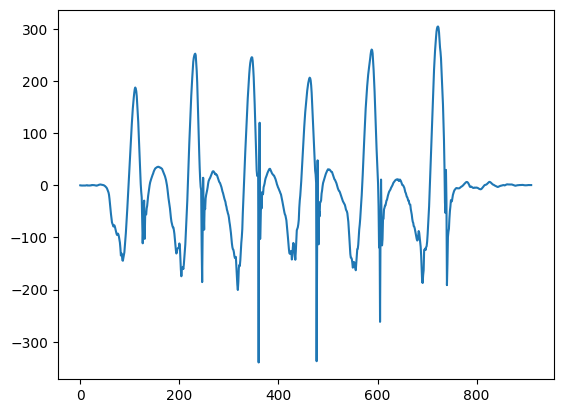

In [16]:
giro_y_prueba = prueba.iloc[:,8].values
plt.plot(giro_y_prueba)


###Encontramos picos con find_peaks de scipy

In [17]:
peaks_giro_y_prueba, _ = find_peaks(giro_y_prueba)#, height=100) sin umbral


In [18]:
# Obtener los índices ordenados en función del valor descendente.
idx_picos_prueba = np.argsort(giro_y_prueba[peaks_giro_y_prueba])[::-1]

# Obtener los 5 valores y sus índices correspondientes.
top_6_values_subida_prueba = giro_y_prueba[peaks_giro_y_prueba][idx_picos_prueba][:6]
top_6_indices_subida_prueba = idx_picos_prueba[:6]
#si cambiamos 6 a 7 nos ordena los valores de los picos de forma descendente
print(top_6_values_subida_prueba)
print(top_6_indices_subida_prueba)

[304.80307 260.52805 252.60054 245.81056 206.54054 187.71054]
[55 45 22 30 38 15]


In [19]:
 #ordenamos (sorted) de forma creciente los 6 índices que evaluados son los 6 máximos 
ind_6_pic_max_subida_prueba = [] #aquí los guardamos
for i in top_6_indices_subida_prueba:
  ind_6_pic_max_subida_prueba.append(peaks_giro_y_prueba[i]) #aquí se apunta al índice de la gráfica con i
ind_6_pic_max_subida_prueba = sorted(ind_6_pic_max_subida_prueba) 

In [20]:
ind_6_pic_max_subida_prueba #estos son los índices de los 6 máximos de nuestra gráfica o dataframe

[111, 232, 346, 463, 588, 722]

###Particionamos nuestro dataframe
con relación al punto medio de los índices de los máximos obtenidos previamente y obtenemos las características.


Abajo vemos la segmentación con los picos, moviendo los índices comprobamos los cortes, por lo que sigue la extracción y concatenación

In [21]:
dataframe_prueba.iloc[math.floor((ind_6_pic_max_subida_prueba[3]+ind_6_pic_max_subida_prueba[4])/2) : math.floor((ind_6_pic_max_subida_prueba[4]+ind_6_pic_max_subida_prueba[5])/2),:]#sin values para visualizar, además de ser un df

,AccX (g),AccY (g),AccZ (g),GyroX (deg/s),GyroY (deg/s),GyroZ (deg/s)
525,0.104431,-0.992065,0.281647,-12.675474,-18.854614,-16.147036
526,0.075989,-0.983460,0.290100,-12.902973,-16.597116,-18.387035
527,0.085663,-1.006073,0.314148,-13.112974,-15.337115,-21.432037
528,0.083801,-1.025543,0.298492,-12.885472,-14.339613,-24.232038
529,0.048340,-1.034393,0.290833,-13.060472,-13.867114,-27.522038
...,...,...,...,...,...,...
650,0.018585,-0.974823,0.266785,-5.255470,-8.214612,0.582969
651,0.105560,-0.970612,0.230988,-3.435470,-7.112112,0.407969
652,0.166840,-1.016754,0.261780,-3.715470,-6.937112,-0.729531
653,0.095154,-1.020966,0.267303,-4.607970,-10.717113,-2.759532


In [22]:
ind_6_pic_max_subida_prueba[-1]

722

In [23]:
for i in [0,1,2,3]:
  print(i)

0
1
2
3


In [24]:
#Para generalizar la función me retornaría 2 df, uno de etiquetas y otro de características.
features_prueba_partes=pd.DataFrame()# Data frame vacío
letras_prueba=[]
base_name = os.path.basename(ruta_prueba)#file
individual_label = base_name.split("_")[2]
individual_label, _ = os.path.splitext(individual_label) #individual label entraría ya para más columnas.
for i in [0,1,2,3]:
  features_por_partes_prueba = time_series_features_extractor(cfg,dataframe_prueba.iloc[math.floor((ind_6_pic_max_subida_prueba[i]+ind_6_pic_max_subida_prueba[i+1])/2) : math.floor((ind_6_pic_max_subida_prueba[i+1]+ind_6_pic_max_subida_prueba[i+2])/2),:])#sin values para visualizar, además de ser un df)
  features_prueba_partes= pd.concat([features_prueba_partes, features_por_partes_prueba])
  letras_prueba.append(individual_label)

df_e_prueba = pd.DataFrame(letras_prueba,columns=["Etiqueta"])


*** Feature extraction started ***
60


<ipython-input-24-4a3ab50b7160>:8: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes_prueba = time_series_features_extractor(cfg,dataframe_prueba.iloc[math.floor((ind_6_pic_max_subida_prueba[i]+ind_6_pic_max_subida_prueba[i+1])/2) : math.floor((ind_6_pic_max_subida_prueba[i+1]+ind_6_pic_max_subida_prueba[i+2])/2),:])#sin values para visualizar, además de ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-24-4a3ab50b7160>:8: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes_prueba = time_series_features_extractor(cfg,dataframe_prueba.iloc[math.floor((ind_6_pic_max_subida_prueba[i]+ind_6_pic_max_subida_prueba[i+1])/2) : math.floor((ind_6_pic_max_subida_prueba[i+1]+ind_6_pic_max_subida_prueba[i+2])/2),:])#sin values para visualizar, además de ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-24-4a3ab50b7160>:8: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes_prueba = time_series_features_extractor(cfg,dataframe_prueba.iloc[math.floor((ind_6_pic_max_subida_prueba[i]+ind_6_pic_max_subida_prueba[i+1])/2) : math.floor((ind_6_pic_max_subida_prueba[i+1]+ind_6_pic_max_subida_prueba[i+2])/2),:])#sin values para visualizar, además de ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-24-4a3ab50b7160>:8: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes_prueba = time_series_features_extractor(cfg,dataframe_prueba.iloc[math.floor((ind_6_pic_max_subida_prueba[i]+ind_6_pic_max_subida_prueba[i+1])/2) : math.floor((ind_6_pic_max_subida_prueba[i+1]+ind_6_pic_max_subida_prueba[i+2])/2),:])#sin values para visualizar, además de ser un df)



*** Feature extraction finished ***


In [25]:
features_prueba_partes

,0_Absolute energy,0_Area under the curve,0_Autocorrelation,0_Centroid,0_ECDF Percentile Count_0,0_ECDF Percentile Count_1,0_ECDF Percentile_0,0_ECDF Percentile_1,0_ECDF_0,0_ECDF_1,...,4_FFT mean coefficient_61,4_FFT mean coefficient_62,4_FFT mean coefficient_63,4_FFT mean coefficient_64,4_FFT mean coefficient_65,5_FFT mean coefficient_61,5_FFT mean coefficient_62,5_FFT mean coefficient_63,5_FFT mean coefficient_64,5_FFT mean coefficient_65
0,60.447008,0.540849,60.447008,0.607956,23.0,94.0,-0.227264,0.582611,0.008475,0.016949,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,62.754406,0.509400,62.754406,0.582487,23.0,92.0,-0.135651,0.562164,0.008696,0.017391,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,51.641688,0.470030,51.641688,0.626793,24.0,96.0,0.024384,0.415649,0.008264,0.016529,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,50.803068,0.483842,50.803068,0.659877,26.0,104.0,-0.010345,0.428101,0.007692,0.015385,...,9.343731,10.862365,11.210996,8.70531,6.233472,7.087251,5.02907,5.513563,5.669117,2.178005


In [26]:
df_e_prueba

,Etiqueta
0,subida
1,subida
2,subida
3,subida


###Generalización

In [27]:
def obt_ptos_corte(file):
  df_general = pd.read_csv(file)# dataframe entero ó usar file, usecols=[3:8]) pero modificaríamos los índices puestos arriba.
  dataframe_a_usar = df_general.iloc[:,3:9] #contiene las 6 aceleraciones para usar del 3 al 8
  giro_y = df_general.iloc[:,8].values #Señal en el giro Y (en el sensor es Z) para obtener los puntos de corte en base a los máximos de esta 
  
  #Encontramos los índices de los picos (máximos)
  peaks_giro_y, _ = find_peaks(giro_y)#, height=100) sin umbral

  # Obtener los índices ordenados en función del valor descendente.
  idx_picos = np.argsort(giro_y[peaks_giro_y])[::-1]

  # Obtener los 6 valores y sus índices correspondientes.
  top_6_values = giro_y[peaks_giro_y][idx_picos][:6]
  top_6_indices = idx_picos[:6]
  #print(top_6_values)
  #print(top_6_indices)

 #ordenamos (sorted) de forma creciente los 6 índices que evaluados son los 6 máximos 
  ind_6_pic_max = [] #aquí los guardamos
  for i in top_6_indices:
    ind_6_pic_max.append(peaks_giro_y[i]) #aquí se apunta al índice de la gráfica con i
    ind_6_pic_max = sorted(ind_6_pic_max) 
  return ind_6_pic_max, dataframe_a_usar #Estos son los índices de los 6 máximos ordenados para a partir de ellos cortar en desde sus puntos medios.

In [28]:
#se comenta file y las partes de etiqueta
def df_caract_por_partes(ptos_corte, df_a_usar):#, file): Para generalizar la función me retornaría 2 df, uno de etiquetas y otro de características.
  features_partes=pd.DataFrame()# Data frame vacío
  #letras=[]
  #base_name = os.path.basename(file)
  #label = base_name.split("_")[2]
  #label, _ = os.path.splitext(label) #obtención de las etiquetas 
  for i in [0,1,2,3]:
    features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)
    features_partes= pd.concat([features_partes, features_por_partes])
    #letras.append(label)

  #df_etiq_partes = pd.DataFrame(letras,columns=["Etiqueta"])
  return features_partes #, df_etiq_partes

In [29]:
#Se comenta todo lo de etiquetas
def load_data(ospath):
  caract = pd.DataFrame()
  #etiquetas = pd.DataFrame()
  for file in glob(ospath):
    try:
      puntos_corte, df_a_usar = obt_ptos_corte(file)
      caract_por_partes = df_caract_por_partes(puntos_corte,df_a_usar)#,file)   caract_por_partes , etiquetas_por_partes =... para las etiquetas

      #Concatenamos todos los df de etiquetas por partes y caract por partes restableciendo (reordenando) los índices con ignore_index = True
      caract = pd.concat([caract,caract_por_partes],ignore_index=True)

      #etiquetas = pd.concat([etiquetas,etiquetas_por_partes],ignore_index=True)
    except Exception as e:
      print(f"Error al procesar el archivo {file}: {str(e)}")
      continue
  return caract#, etiquetas

###Obtención de características de prueba


In [30]:
Caract_prueba = load_data("/content/drive/MyDrive/Tareas CDSI/Proyecto/csv_pruebas/*.csv") # Caract_prueba, Etiq_prueba 


*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***


In [31]:
#Etiq_prueba

In [32]:
Caract_prueba

,0_Absolute energy,0_Area under the curve,0_Autocorrelation,0_Centroid,0_ECDF Percentile Count_0,0_ECDF Percentile Count_1,0_ECDF Percentile_0,0_ECDF Percentile_1,0_ECDF_0,0_ECDF_1,...,2_FFT mean coefficient_65,3_FFT mean coefficient_63,3_FFT mean coefficient_64,3_FFT mean coefficient_65,4_FFT mean coefficient_63,4_FFT mean coefficient_64,4_FFT mean coefficient_65,5_FFT mean coefficient_63,5_FFT mean coefficient_64,5_FFT mean coefficient_65
0,53.376757,0.502879,53.376757,0.793868,23.0,93.0,0.019501,0.627960,0.008547,0.017094,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,51.676226,0.510522,51.676226,0.730960,22.0,89.0,0.062836,0.607239,0.008929,0.017857,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,34.956225,0.502067,34.956225,0.670112,23.0,92.0,0.096863,0.598206,0.008621,0.017241,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,31.223365,0.503268,31.223365,0.737990,25.0,100.0,0.127502,0.548553,0.008000,0.016000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,60.447008,0.540849,60.447008,0.607956,23.0,94.0,-0.227264,0.582611,0.008475,0.016949,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,62.754406,0.509400,62.754406,0.582487,23.0,92.0,-0.135651,0.562164,0.008696,0.017391,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,51.641688,0.470030,51.641688,0.626793,24.0,96.0,0.024384,0.415649,0.008264,0.016529,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,50.803068,0.483842,50.803068,0.659877,26.0,104.0,-0.010345,0.428101,0.007692,0.015385,...,0.000614,2.019997,2.727675,0.958989,11.210996,8.70531,6.233472,5.513563,5.669117,2.178005


In [33]:
print(Caract_prueba.isna().sum().sum()) #Contamos los NaN´s en todo el dataframe

270


###El código de arriba, en particular, sirve para obtener las etiquetas de datos etiquetados (por lo regular mezclados) pero 
como personalmente conozco las etiquetas que corresponden a los datos, no es necesario etiquetarlos, solamente generar una tabla de etiquetas del tamaño de la tabla obtenida, para esto juntamos TODOS los datos por categoría y hacemos las llamadas necesarias (3 en este caso) por categoría, generando tablas del tamaño de filas con respecto a las categorías, por lo que al final concatenamos las tablas y las etiquetas para obtener la tabla general de características y etiquetas

Se usarán las funciones de arriba pero se comentaron las líneas pertenecientes a las etiquetas para hacerlo manual y NO etiquetar los datos

###Características se subir, bajar escaleras y piso plano. Sensor puesto en el pie.

In [34]:
Caract_pie_bajada_jorge = load_data("/content/drive/MyDrive/Tareas CDSI/Proyecto/csv_proyecto/mov_pies/bajar_escaleras/Jorge/*.csv") # Caract_subida, Etiq_subida 


*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***


In [35]:
Caract_pie_bajada_jorge

,0_Absolute energy,0_Area under the curve,0_Autocorrelation,0_Centroid,0_ECDF Percentile Count_0,0_ECDF Percentile Count_1,0_ECDF Percentile_0,0_ECDF Percentile_1,0_ECDF_0,0_ECDF_1,...,5_FFT mean coefficient_60,5_FFT mean coefficient_61,5_FFT mean coefficient_62,5_FFT mean coefficient_63,5_FFT mean coefficient_64,5_FFT mean coefficient_65,5_FFT mean coefficient_66,5_FFT mean coefficient_67,5_FFT mean coefficient_68,5_FFT mean coefficient_69
0,90.295817,0.636944,90.295817,0.648195,21.0,84.0,-0.109558,0.591949,0.009524,0.019048,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,88.485718,0.617367,88.485718,0.610294,20.0,80.0,-0.024658,0.528686,0.009901,0.019802,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,89.404656,0.568125,89.404656,0.647867,20.0,80.0,-0.126434,0.651092,0.009901,0.019802,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,90.967286,0.582971,90.967286,0.638491,20.0,80.0,-0.003876,0.461365,0.009901,0.019802,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,81.365697,0.610953,81.365697,0.606239,20.0,83.0,-0.040863,0.597809,0.009615,0.019231,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,101.133981,0.599014,101.133981,0.621838,18.0,75.0,-0.118286,0.619934,0.010638,0.021277,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,12.259354,0.186801,12.259354,0.316066,9.0,39.0,-0.539124,0.357269,0.020408,0.040816,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,85.412897,0.487314,85.412897,0.243490,12.0,48.0,0.181274,1.394470,0.016667,0.033333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9.797527,0.150962,9.797527,0.256958,9.0,36.0,-0.392853,0.308197,0.022222,0.044444,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,79.595679,0.606671,79.595679,0.237557,18.0,75.0,-0.344025,0.681946,0.010638,0.021277,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
Caract_pie_bajada_yo = load_data("/content/drive/MyDrive/Tareas CDSI/Proyecto/csv_proyecto/mov_pies/bajar_escaleras/Yo/*.csv") # Caract_subida, Etiq_subida 


*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)


Error al procesar el archivo /content/drive/MyDrive/Tareas CDSI/Proyecto/csv_proyecto/mov_pies/bajar_escaleras/Yo/DataLog20230331_162349.csv: Input signal must have a length >= n_coeff
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***


In [37]:
Caract_pie_bajada_yo

,0_Absolute energy,0_Area under the curve,0_Autocorrelation,0_Centroid,0_ECDF Percentile Count_0,0_ECDF Percentile Count_1,0_ECDF Percentile_0,0_ECDF Percentile_1,0_ECDF_0,0_ECDF_1,...,5_FFT mean coefficient_59,5_FFT mean coefficient_60,5_FFT mean coefficient_61,5_FFT mean coefficient_62,0_FFT mean coefficient_63,1_FFT mean coefficient_63,2_FFT mean coefficient_63,3_FFT mean coefficient_63,4_FFT mean coefficient_63,5_FFT mean coefficient_63
0,44.977658,0.426165,44.977658,0.771428,22.0,91.0,0.017700,0.547974,0.008772,0.017544,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,40.518546,0.461403,40.518546,0.730115,21.0,87.0,0.076324,0.599762,0.009174,0.018349,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,40.361491,0.435341,40.361491,0.760931,21.0,86.0,0.058167,0.571716,0.009259,0.018519,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,33.950199,0.449182,33.950199,0.721944,21.0,87.0,-0.006134,0.623444,0.009174,0.018349,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,53.376757,0.502879,53.376757,0.793868,23.0,93.0,0.019501,0.627960,0.008547,0.017094,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,51.676226,0.510522,51.676226,0.730960,22.0,89.0,0.062836,0.607239,0.008929,0.017857,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,34.956225,0.502067,34.956225,0.670112,23.0,92.0,0.096863,0.598206,0.008621,0.017241,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,31.223365,0.503268,31.223365,0.737990,25.0,100.0,0.127502,0.548553,0.008000,0.016000,...,0.223256,0.305267,0.116932,0.215201,NaN,NaN,NaN,NaN,NaN,NaN
8,15.877965,0.164705,15.877965,0.405125,11.0,45.0,-0.337158,0.137268,0.017544,0.035088,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,32.429454,0.320859,32.429454,0.238652,11.0,47.0,-0.024261,0.741211,0.016949,0.033898,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
Caract_pie_bajada_Charlie = load_data("/content/drive/MyDrive/Tareas CDSI/Proyecto/csv_proyecto/mov_pies/bajar_escaleras/Charlie/*.csv") # Caract_subida, Etiq_subida 


*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)


Error al procesar el archivo /content/drive/MyDrive/Tareas CDSI/Proyecto/csv_proyecto/mov_pies/bajar_escaleras/Charlie/DataLog20230331_172702.csv: Input signal must have a length >= n_coeff
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)


Error al procesar el archivo /content/drive/MyDrive/Tareas CDSI/Proyecto/csv_proyecto/mov_pies/bajar_escaleras/Charlie/DataLog20230331_173200.csv: Input signal must have a length >= n_coeff
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***


In [39]:
Caract_pie_bajada_Charlie

,0_Absolute energy,0_Area under the curve,0_Autocorrelation,0_Centroid,0_ECDF Percentile Count_0,0_ECDF Percentile Count_1,0_ECDF Percentile_0,0_ECDF Percentile_1,0_ECDF_0,0_ECDF_1,...,5_FFT mean coefficient_80,5_FFT mean coefficient_81,5_FFT mean coefficient_82,5_FFT mean coefficient_83,5_FFT mean coefficient_84,5_FFT mean coefficient_85,5_FFT mean coefficient_86,5_FFT mean coefficient_87,5_FFT mean coefficient_88,5_FFT mean coefficient_89
0,18.025930,0.216354,18.025930,0.509806,15.0,60.0,-0.260223,0.240417,0.013333,0.026667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,62.154770,0.368444,62.154770,0.368379,15.0,60.0,-0.153015,0.513824,0.013333,0.026667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,15.671946,0.216827,15.671946,0.471000,15.0,60.0,-0.245056,0.297668,0.013333,0.026667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,74.715837,0.362304,74.715837,0.334569,14.0,56.0,-0.008392,0.486237,0.014286,0.028571,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,24.888205,0.262801,24.888205,0.443081,14.0,57.0,-0.270538,0.298004,0.013889,0.027778,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,54.738548,0.313257,54.738548,0.311379,14.0,56.0,-0.090485,0.523956,0.014085,0.028169,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,93.439019,0.573536,93.439019,0.899755,26.0,106.0,-0.101868,0.429230,0.007519,0.015038,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,13.517353,0.179045,13.517353,0.445522,14.0,56.0,-0.115204,0.207458,0.014286,0.028571,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,88.208170,0.565697,88.208170,0.855705,26.0,107.0,-0.159058,0.369995,0.007463,0.014925,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,92.300419,0.572182,92.300419,0.838313,27.0,108.0,-0.106567,0.415466,0.007407,0.014815,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Después de solucionarlo con try-except y verlo de uno por uno extraemos el de los tres juntos


In [40]:
Caract_pie_bajada = load_data("/content/drive/MyDrive/Tareas CDSI/Proyecto/csv_proyecto/mov_pies/bajar_escaleras/*/*.csv") # Caract_subida, Etiq_subida 


*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)


Error al procesar el archivo /content/drive/MyDrive/Tareas CDSI/Proyecto/csv_proyecto/mov_pies/bajar_escaleras/Charlie/DataLog20230331_172702.csv: Input signal must have a length >= n_coeff
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)


Error al procesar el archivo /content/drive/MyDrive/Tareas CDSI/Proyecto/csv_proyecto/mov_pies/bajar_escaleras/Charlie/DataLog20230331_173200.csv: Input signal must have a length >= n_coeff
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)


Error al procesar el archivo /content/drive/MyDrive/Tareas CDSI/Proyecto/csv_proyecto/mov_pies/bajar_escaleras/Yo/DataLog20230331_162349.csv: Input signal must have a length >= n_coeff
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***


In [41]:
Caract_pie_bajada

,0_Absolute energy,0_Area under the curve,0_Autocorrelation,0_Centroid,0_ECDF Percentile Count_0,0_ECDF Percentile Count_1,0_ECDF Percentile_0,0_ECDF Percentile_1,0_ECDF_0,0_ECDF_1,...,5_FFT mean coefficient_80,5_FFT mean coefficient_81,5_FFT mean coefficient_82,5_FFT mean coefficient_83,5_FFT mean coefficient_84,5_FFT mean coefficient_85,5_FFT mean coefficient_86,5_FFT mean coefficient_87,5_FFT mean coefficient_88,5_FFT mean coefficient_89
0,18.025930,0.216354,18.025930,0.509806,15.0,60.0,-0.260223,0.240417,0.013333,0.026667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,62.154770,0.368444,62.154770,0.368379,15.0,60.0,-0.153015,0.513824,0.013333,0.026667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,15.671946,0.216827,15.671946,0.471000,15.0,60.0,-0.245056,0.297668,0.013333,0.026667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,74.715837,0.362304,74.715837,0.334569,14.0,56.0,-0.008392,0.486237,0.014286,0.028571,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,24.888205,0.262801,24.888205,0.443081,14.0,57.0,-0.270538,0.298004,0.013889,0.027778,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,43.814594,0.463118,43.814594,0.638272,21.0,87.0,-0.181183,0.696686,0.009174,0.018349,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
128,50.114409,0.476823,50.114409,0.703045,22.0,91.0,-0.045807,0.579468,0.008772,0.017544,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
129,27.054847,0.361009,27.054847,0.676847,22.0,89.0,-0.067291,0.408173,0.008929,0.017857,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
130,41.444836,0.443486,41.444836,0.653145,22.0,88.0,-0.134857,0.416809,0.009091,0.018182,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
Caract_pie_plano = load_data("/content/drive/MyDrive/Tareas CDSI/Proyecto/csv_proyecto/mov_pies/caminata_piso_plano/*/*.csv") # Caract_subida, Etiq_subida 


*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***


In [43]:
Caract_pie_plano

,0_Absolute energy,0_Area under the curve,0_Autocorrelation,0_Centroid,0_ECDF Percentile Count_0,0_ECDF Percentile Count_1,0_ECDF Percentile_0,0_ECDF Percentile_1,0_ECDF_0,0_ECDF_1,...,5_FFT mean coefficient_85,5_FFT mean coefficient_86,5_FFT mean coefficient_87,5_FFT mean coefficient_88,5_FFT mean coefficient_89,5_FFT mean coefficient_90,5_FFT mean coefficient_91,5_FFT mean coefficient_92,5_FFT mean coefficient_93,5_FFT mean coefficient_94
0,7.737572,0.116663,7.737572,0.276487,11.0,44.0,-0.335052,0.083893,0.018182,0.036364,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,62.215160,0.307039,62.215160,0.107934,10.0,42.0,-0.025604,0.841156,0.018868,0.037736,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,79.577357,0.485930,79.577357,0.597424,21.0,84.0,-0.114349,0.355225,0.009524,0.019048,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,85.235887,0.503382,85.235887,0.597680,21.0,84.0,-0.158051,0.277863,0.009434,0.018868,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,69.461687,0.486637,69.461687,0.746408,24.0,96.0,-0.176331,0.246765,0.008264,0.016529,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,6.459394,0.142735,6.459394,0.387886,12.0,51.0,-0.063599,0.247314,0.015625,0.031250,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
140,28.094563,0.408038,28.094563,0.393275,25.0,101.0,-0.174988,0.409729,0.007874,0.015748,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
141,73.228781,0.675550,73.228781,0.811368,37.0,151.0,-0.102081,0.424103,0.005291,0.010582,...,0.032006,0.039837,0.026109,0.050621,0.047459,0.013854,0.054421,0.064859,0.059165,0.018825
142,45.146105,0.426410,45.146105,0.763955,25.0,100.0,-0.119507,0.395477,0.008000,0.016000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
Caract_pie_subida = load_data("/content/drive/MyDrive/Tareas CDSI/Proyecto/csv_proyecto/mov_pies/subir_escaleras/*/*.csv") # Caract_subida, Etiq_subida 


*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***
*** Feature extraction started ***
60


<ipython-input-28-03e7ba9a0d68>:9: UserWarning: Using default sampling frequency set in configuration file.
  features_por_partes = time_series_features_extractor(cfg,df_a_usar.iloc[math.floor((ptos_corte[i]+ptos_corte[i+1])/2) : math.floor((ptos_corte[i+1]+ptos_corte[i+2])/2),:])#sin values para ser un df)



*** Feature extraction finished ***


In [45]:
Caract_pie_subida

,0_Absolute energy,0_Area under the curve,0_Autocorrelation,0_Centroid,0_ECDF Percentile Count_0,0_ECDF Percentile Count_1,0_ECDF Percentile_0,0_ECDF Percentile_1,0_ECDF_0,0_ECDF_1,...,2_FFT mean coefficient_75,3_FFT mean coefficient_75,4_FFT mean coefficient_75,5_FFT mean coefficient_75,0_FFT mean coefficient_76,1_FFT mean coefficient_76,2_FFT mean coefficient_76,3_FFT mean coefficient_76,4_FFT mean coefficient_76,5_FFT mean coefficient_76
0,24.043269,0.376674,24.043269,0.731477,29.0,117.0,-0.196747,0.198486,0.006803,0.013605,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,22.102165,0.351990,22.102165,0.621674,28.0,114.0,-0.154205,0.297241,0.006993,0.013986,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,26.282092,0.380808,26.282092,0.670440,28.0,115.0,-0.131287,0.324585,0.006944,0.013889,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,25.711874,0.398533,25.711874,0.665908,29.0,119.0,-0.189270,0.328918,0.006711,0.013423,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,42.264026,0.441155,42.264026,0.861624,30.0,120.0,-0.185699,0.312988,0.006667,0.013333,...,0.000958,25.584175,1.193698,11.164487,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,72.489952,0.516432,72.489952,0.602486,23.0,92.0,-0.265808,0.384644,0.008621,0.017241,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
140,88.107670,0.562010,88.107670,0.666941,24.0,96.0,-0.359589,0.313599,0.008264,0.016529,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
141,71.907335,0.514157,71.907335,0.617393,23.0,94.0,-0.279358,0.349243,0.008475,0.016949,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
142,73.790040,0.480218,73.790040,0.640860,23.0,95.0,-0.237213,0.305328,0.008403,0.016807,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
dic_bajada = {"Etiqueta": ["Bajada"]*132}

In [47]:
df_bajada = pd.DataFrame(dic_bajada)


In [48]:
df_bajada

,Etiqueta
0,Bajada
1,Bajada
2,Bajada
3,Bajada
4,Bajada
...,...
127,Bajada
128,Bajada
129,Bajada
130,Bajada


In [49]:
dic_plano = {"Etiqueta": ["Plano"]*144}
df_plano = pd.DataFrame(dic_plano)
df_plano

,Etiqueta
0,Plano
1,Plano
2,Plano
3,Plano
4,Plano
...,...
139,Plano
140,Plano
141,Plano
142,Plano


In [50]:
dic_subida = {"Etiqueta": ["Subida"]*144}
df_subida = pd.DataFrame(dic_subida)
df_subida

,Etiqueta
0,Subida
1,Subida
2,Subida
3,Subida
4,Subida
...,...
139,Subida
140,Subida
141,Subida
142,Subida


In [51]:
df_caracteristicas_nans = pd.concat([Caract_pie_bajada,Caract_pie_plano,Caract_pie_subida], ignore_index=True)
df_caracteristicas_nans

,0_Absolute energy,0_Area under the curve,0_Autocorrelation,0_Centroid,0_ECDF Percentile Count_0,0_ECDF Percentile Count_1,0_ECDF Percentile_0,0_ECDF Percentile_1,0_ECDF_0,0_ECDF_1,...,4_FFT mean coefficient_90,4_FFT mean coefficient_91,4_FFT mean coefficient_92,4_FFT mean coefficient_93,4_FFT mean coefficient_94,5_FFT mean coefficient_90,5_FFT mean coefficient_91,5_FFT mean coefficient_92,5_FFT mean coefficient_93,5_FFT mean coefficient_94
0,18.025930,0.216354,18.025930,0.509806,15.0,60.0,-0.260223,0.240417,0.013333,0.026667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,62.154770,0.368444,62.154770,0.368379,15.0,60.0,-0.153015,0.513824,0.013333,0.026667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,15.671946,0.216827,15.671946,0.471000,15.0,60.0,-0.245056,0.297668,0.013333,0.026667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,74.715837,0.362304,74.715837,0.334569,14.0,56.0,-0.008392,0.486237,0.014286,0.028571,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,24.888205,0.262801,24.888205,0.443081,14.0,57.0,-0.270538,0.298004,0.013889,0.027778,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,72.489952,0.516432,72.489952,0.602486,23.0,92.0,-0.265808,0.384644,0.008621,0.017241,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
416,88.107670,0.562010,88.107670,0.666941,24.0,96.0,-0.359589,0.313599,0.008264,0.016529,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
417,71.907335,0.514157,71.907335,0.617393,23.0,94.0,-0.279358,0.349243,0.008475,0.016949,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
418,73.790040,0.480218,73.790040,0.640860,23.0,95.0,-0.237213,0.305328,0.008403,0.016807,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
df_Etiquetas =pd.concat([df_bajada,df_plano,df_subida], ignore_index=True)
df_Etiquetas

,Etiqueta
0,Bajada
1,Bajada
2,Bajada
3,Bajada
4,Bajada
...,...
415,Subida
416,Subida
417,Subida
418,Subida


Eliminación de NaN´s

In [53]:
df_caracteristicas = df_caracteristicas_nans.dropna(axis=1)

In [54]:
df_caracteristicas #DataFrame de características final

,0_Absolute energy,0_Area under the curve,0_Autocorrelation,0_Centroid,0_ECDF Percentile Count_0,0_ECDF Percentile Count_1,0_ECDF Percentile_0,0_ECDF Percentile_1,0_ECDF_0,0_ECDF_1,...,5_Wavelet variance_0,5_Wavelet variance_1,5_Wavelet variance_2,5_Wavelet variance_3,5_Wavelet variance_4,5_Wavelet variance_5,5_Wavelet variance_6,5_Wavelet variance_7,5_Wavelet variance_8,5_Zero crossing rate
0,18.025930,0.216354,18.025930,0.509806,15.0,60.0,-0.260223,0.240417,0.013333,0.026667,...,648.538411,3487.995855,11378.869545,26161.633368,47152.184549,72954.022803,99714.942008,124124.078918,143011.810298,1.0
1,62.154770,0.368444,62.154770,0.368379,15.0,60.0,-0.153015,0.513824,0.013333,0.026667,...,1002.758960,1401.704044,3119.004243,6731.537418,13106.509978,22908.510426,36354.056352,53057.386209,71872.382670,5.0
2,15.671946,0.216827,15.671946,0.471000,15.0,60.0,-0.245056,0.297668,0.013333,0.026667,...,646.587349,3385.823701,9667.768924,23280.094975,45875.096032,78615.525652,120498.926645,167368.332515,213333.669211,1.0
3,74.715837,0.362304,74.715837,0.334569,14.0,56.0,-0.008392,0.486237,0.014286,0.028571,...,1787.223040,4031.889392,6655.799169,11127.940602,17995.743937,26964.842579,38077.177224,51717.596126,67758.106274,3.0
4,24.888205,0.262801,24.888205,0.443081,14.0,57.0,-0.270538,0.298004,0.013889,0.027778,...,1169.838304,5612.480144,14293.036623,32212.171187,60174.934022,98184.423262,142872.600025,187538.911374,225989.026234,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,72.489952,0.516432,72.489952,0.602486,23.0,92.0,-0.265808,0.384644,0.008621,0.017241,...,202.552735,836.978456,3539.581937,10357.957447,22664.115263,40970.379274,64748.357399,92397.438475,121538.946112,4.0
416,88.107670,0.562010,88.107670,0.666941,24.0,96.0,-0.359589,0.313599,0.008264,0.016529,...,84.594076,926.011029,4682.312474,13543.678868,28843.885293,50742.099540,77992.914964,108126.326027,138248.857923,5.0
417,71.907335,0.514157,71.907335,0.617393,23.0,94.0,-0.279358,0.349243,0.008475,0.016949,...,282.905887,941.735017,3787.739491,11078.260356,24478.192223,44660.758596,70913.810383,101184.147203,132687.593077,4.0
418,73.790040,0.480218,73.790040,0.640860,23.0,95.0,-0.237213,0.305328,0.008403,0.016807,...,365.589460,1702.011670,5224.746656,12378.402440,24221.339337,41277.277391,63297.778309,89150.881386,116930.203161,3.0


In [55]:
print(df_caracteristicas.isna().sum().sum()) #Contamos los NaN´s en todo el dataframe

0


###Modelado


In [56]:
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


In [57]:
X_train, X_test, Y_train, Y_test = train_test_split(df_caracteristicas, df_Etiquetas.values.flatten(), test_size = 0.2 , random_state = 0) 

In [58]:
pca = PCA(n_components=2) #Vemos cuántas variables utilizar para seleccionarlas y que expliquen lo más posible la varianza existente entre to
X_train = pca.fit_transform(X_train) 
X_test = pca.transform(X_test)
#explained_variance = pca.explained_variance_ratio_

In [59]:
df_caracteristicas_PCA = pca.fit_transform(df_caracteristicas) #Para Kfold cross se usa toda la tabla.

In [60]:
X_train.shape

(336, 2)

In [61]:
#pca.explained_variance_ratio_

In [62]:
#A = explained_variance.sum()
#A

In [63]:
#suma = 0
#porcentaje = .95
#i = 0
#while porcentaje >= suma:
#  suma += explained_variance[i]
#  i+=1

#print(i-1)

In [64]:
#suma = 0
#for i in range(0,3):
#    suma += explained_variance[i]
#suma


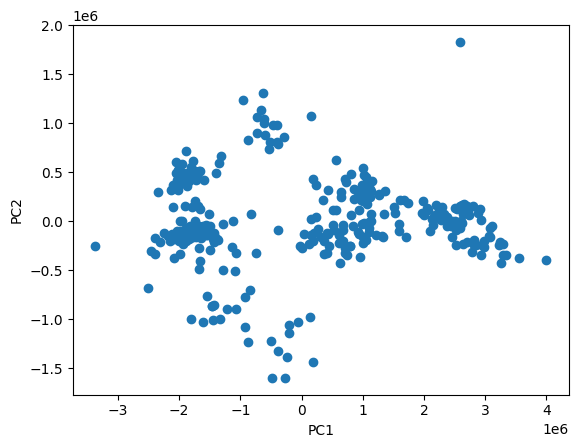

In [65]:
# Convertir a dataframe
df_pca = pd.DataFrame(data=X_train, columns=['PC1', 'PC2'])

# Hacer el gráfico
plt.scatter(df_pca['PC1'], df_pca['PC2'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

Modelación

In [66]:
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

In [67]:
# Crea una instancia de validación cruzada K-fold
kf = KFold(n_splits=5, shuffle=True, random_state=0)

In [68]:
#Etiquetas utilizadas 
etiquetas = ["Subida", "Bajada", "Plano"] 


###SVM

In [69]:
SVM_clf = SVC(kernel='linear', C=1)


In [70]:
SVM_clf.fit(X_train, Y_train)

SVC(C=1, kernel='linear')

In [71]:
Y_pred_total_SVM = SVM_clf.predict(X_test)

In [72]:
print(accuracy_score(Y_test,y_pred=Y_pred_total_SVM))
print(classification_report(Y_test,Y_pred_total_SVM)) 

0.7857142857142857
              precision    recall  f1-score   support

      Bajada       0.77      0.40      0.53        25
       Plano       0.74      0.97      0.84        30
      Subida       0.84      0.93      0.89        29

    accuracy                           0.79        84
   macro avg       0.79      0.77      0.75        84
weighted avg       0.79      0.79      0.76        84



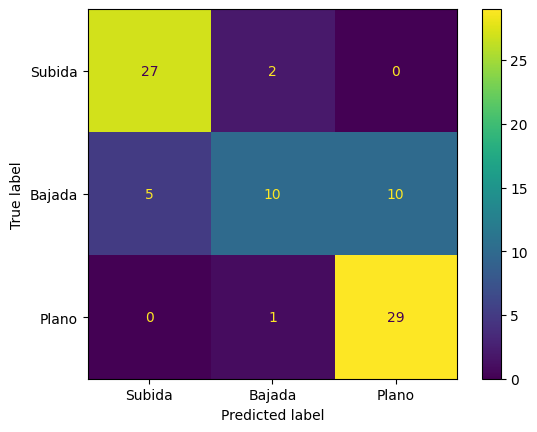

In [73]:
conf_matrix_Total_SVM = confusion_matrix(Y_test, Y_pred_total_SVM, labels=etiquetas)
disp_svm_total = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_Total_SVM, display_labels=etiquetas)
disp_svm_total.plot()

KFold Cross Validation
Como X_train en PCA tiene 336 instancias (80% de entrenaamiento) estás de dividerin entra 5 para el tamaño del fold igual a 5, de ahí que cada matriz tiene que tener en total 67 elementos (una de 68), pues 336/5 es aprox 67. Es decir que cada fold se partió a su vez en entrenamiento y prueba (suponemos que en la misma proporción 80-20). Arriba no se parte y se evalúan los 84 elementos de la predicción (total = 420) 420-336=84.

En k-fold cross validation, cada fold se utiliza como conjunto de prueba y los restantes k-1 folds se utilizan como conjunto de entrenamiento. Por lo tanto, en cada iteración del proceso de entrenamiento y evaluación cruzada, se entrena un modelo utilizando k-1 folds y se evalúa el modelo utilizando el fold restante como conjunto de prueba.

Por lo tanto, si uno de los folds tiene 67 elementos, significa que se utilizarán 67 instancias como conjunto de prueba y las restantes 269 instancias se utilizarán como conjunto de entrenamiento en esa iteración en particular. Se entrenará un modelo utilizando las 269 instancias de entrenamiento y se evaluará el modelo utilizando las 67 instancias de prueba, lo que resultará en una matriz de confusión de tamaño 3x3 (en el caso de que haya tres clases).

Después de completar todas las iteraciones, se tendrán 5 matrices de confusión (en el caso de que se utilicen 5 folds) y se pueden calcular estadísticas resumen, como la media y la desviación estándar de las matrices de confusión obtenidas. En general, se utiliza la media de las matrices de confusión obtenidas para evaluar el desempeño del modelo.

Se tardó alrededor de 25 minutos la validación.
importante que df_Etiquetas.values.flatten() y no flatten().tolist()

Según Hussein, y creo que sí, kfold se ingresan las 420 instancias

SVM mean accuracy: 0.7904761904761906
Fold 1 SVM confusion matrix:
Fold 2 SVM confusion matrix:
Fold 3 SVM confusion matrix:
Fold 4 SVM confusion matrix:
Fold 5 SVM confusion matrix:
Matriz de confusión promedio para SVM:
Matriz de confusión total (obtenida de la suma de cada fold) para SVM, es decir, se mutiplicó por 5 cada celda de la matriz promedio.
Support Vector Machine mean accuracy: 0.7904761904761906


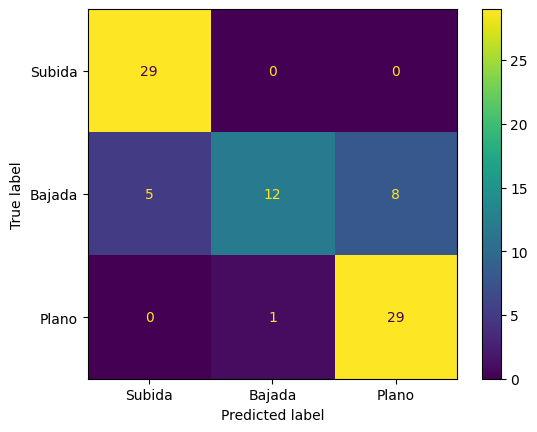

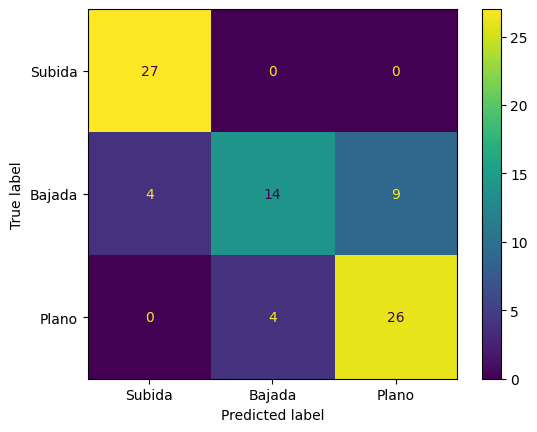

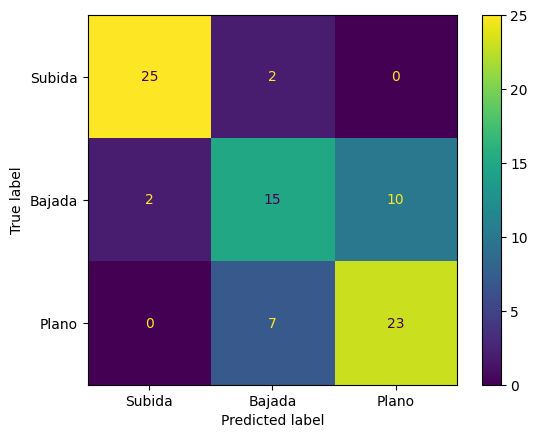

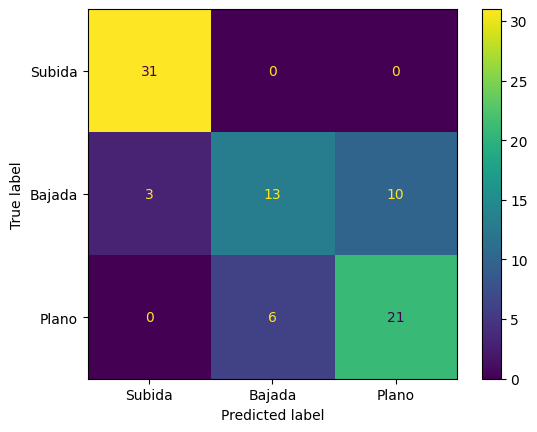

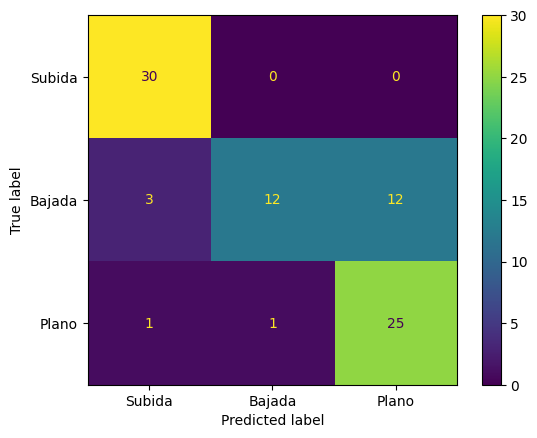

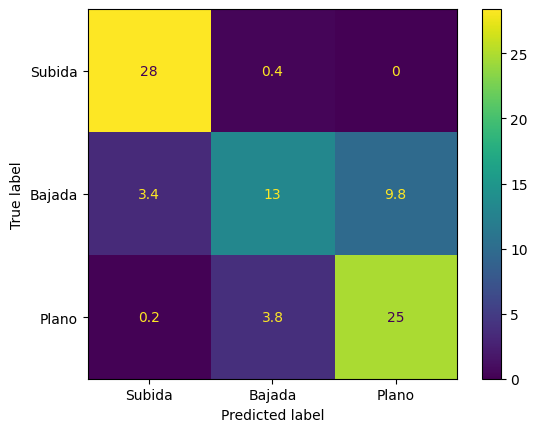

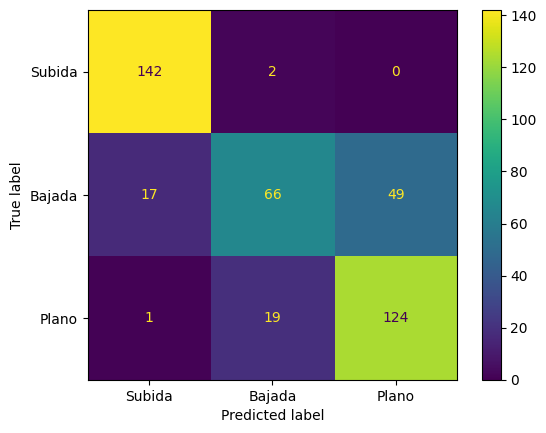

In [81]:
# Crea instancias de clasificadores SVM y Naive Bayes
SVM_conf_matrices = []

# Entrena y evalúa el clasificador SVM utilizando validación cruzada
SVM_scores = []

for train_index, test_index in kf.split(df_caracteristicas_PCA): #X_train es df_caracteristicas_PCA
    X_train_fold_svm, X_test_fold_svm = df_caracteristicas_PCA[train_index], df_caracteristicas_PCA[test_index] #X_train es df_caracteristicas_PCA
    Y_train_fold_svm, Y_test_fold_svm = df_Etiquetas.values.flatten()[train_index], df_Etiquetas.values.flatten()[test_index] #Y_train son las etiquetas
    SVM_clf.fit(X_train_fold_svm, Y_train_fold_svm)
    Y_pred_fold_svm = SVM_clf.predict(X_test_fold_svm)
    SVM_scores.append(accuracy_score(Y_test_fold_svm, Y_pred_fold_svm))
    SVM_conf_matrices.append(confusion_matrix(Y_test_fold_svm, Y_pred_fold_svm, labels= etiquetas))  # agrega la matriz de confusión a la lista
    
print("SVM mean accuracy:", np.mean(SVM_scores))

# Imprime las matrices de confusión
for i in range(len(SVM_conf_matrices)):
    print(f"Fold {i+1} SVM confusion matrix:")
    disp = ConfusionMatrixDisplay(confusion_matrix=SVM_conf_matrices[i], display_labels=etiquetas)
    disp.plot()

#Imprimir la matriz de confusión promedio    
SVM_cm_avg = np.mean(SVM_conf_matrices, axis=0)
print("Matriz de confusión promedio para SVM:")
disp_MCP_SVM = ConfusionMatrixDisplay(confusion_matrix=SVM_cm_avg, display_labels=etiquetas)
disp_MCP_SVM.plot()

#imprimir la suma de los elementos de cada matriz de confusión obtenidos en cada fold    
SVM_cm_suma = SVM_cm_avg*5
SVM_cm_suma = SVM_cm_suma.astype(int)

print("Matriz de confusión total (obtenida de la suma de cada fold) para SVM, es decir, se mutiplicó por 5 cada celda de la matriz promedio.")
disp_MCT_SVM = ConfusionMatrixDisplay(confusion_matrix=SVM_cm_suma, display_labels= etiquetas)
disp_MCT_SVM.plot()

print("Support Vector Machine mean accuracy:", np.mean(SVM_scores))


### Naive Bayes

In [75]:
NB_clf = GaussianNB()


In [76]:
NB_clf.fit(X_train, Y_train)

GaussianNB()

In [77]:
Y_pred_total_NB = NB_clf.predict(X_test)

In [78]:
print(accuracy_score(Y_test,y_pred=Y_pred_total_NB))
print(classification_report(Y_test,Y_pred_total_NB)) 

0.7976190476190477
              precision    recall  f1-score   support

      Bajada       0.70      0.56      0.62        25
       Plano       0.77      0.90      0.83        30
      Subida       0.90      0.90      0.90        29

    accuracy                           0.80        84
   macro avg       0.79      0.79      0.78        84
weighted avg       0.79      0.80      0.79        84



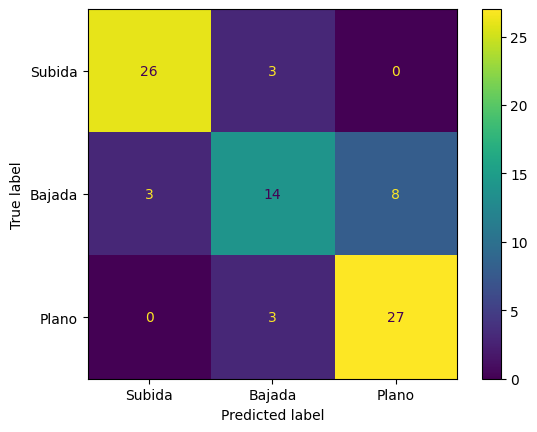

In [79]:
conf_matrix_Total_NB = confusion_matrix(Y_test, Y_pred_total_NB, labels=etiquetas)
disp_nb_total = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_Total_NB, display_labels=etiquetas)
disp_nb_total.plot()

KFold Cross Validation

NB mean accuracy: 0.7976190476190477
Fold 1 NB confusion matrix:
Fold 2 NB confusion matrix:
Fold 3 NB confusion matrix:
Fold 4 NB confusion matrix:
Fold 5 NB confusion matrix:
Matriz de confusión promedio para NB:
Matriz de confusión total (obtenida de la suma de cada fold) para NB, es decir, se mutiplicó por 5 cada celda de la matriz promedio.
Naive Bayes mean accuracy: 0.7976190476190477


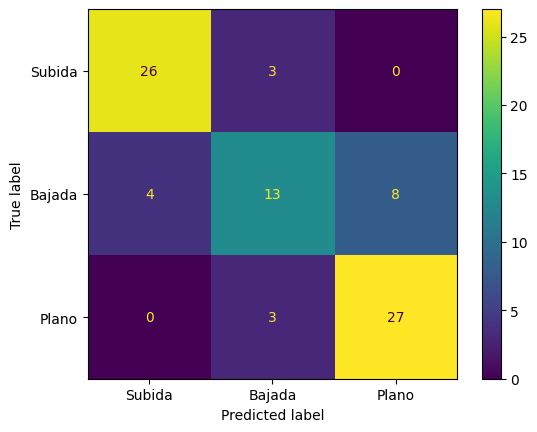

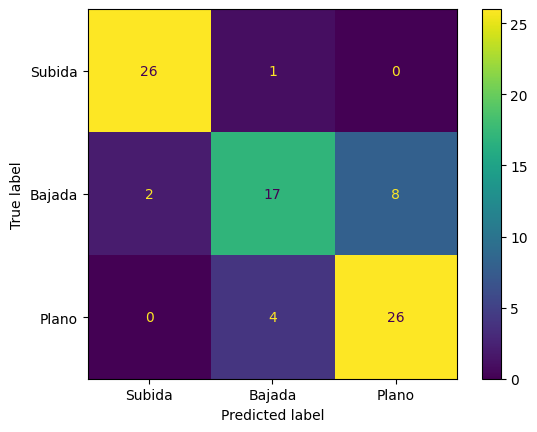

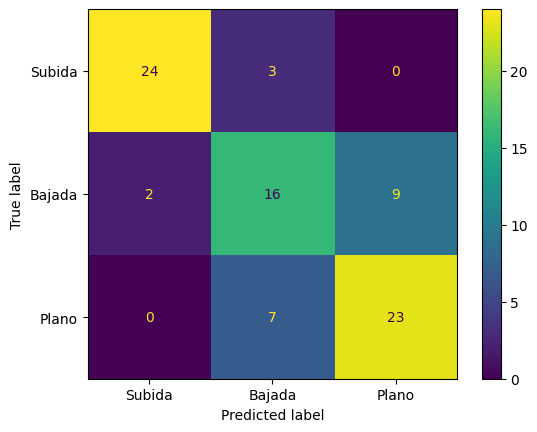

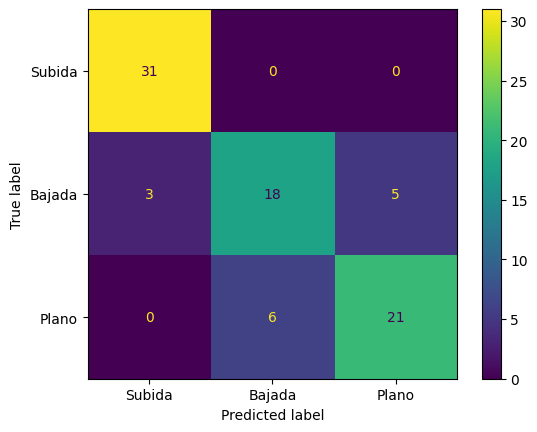

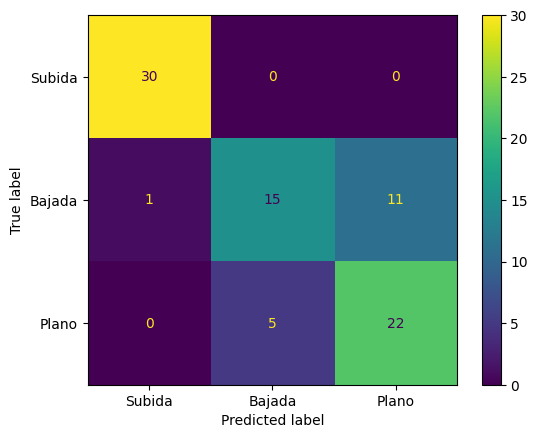

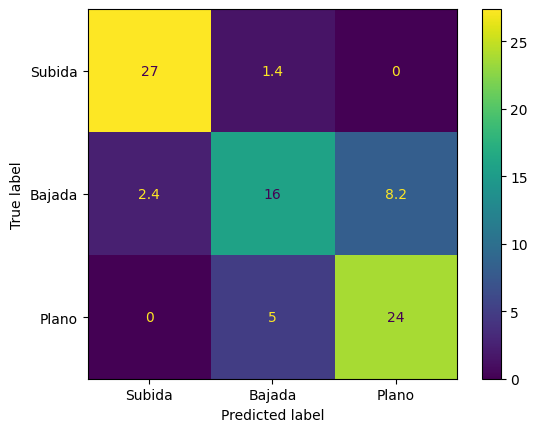

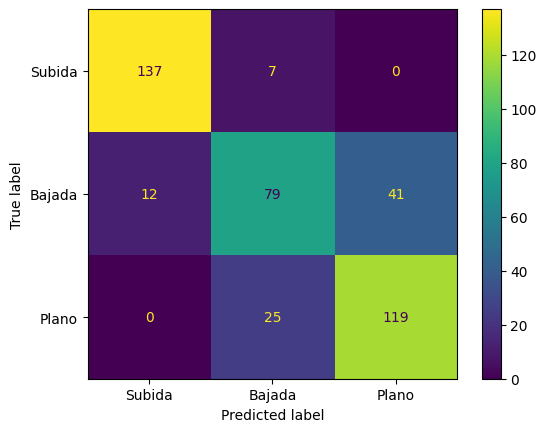

In [80]:
NB_conf_matrices = []

# Entrena y evalúa el clasificador Naive Bayes utilizando validación cruzada
NB_scores = []

for train_index_nb, test_index_nb in kf.split(df_caracteristicas_PCA):
    X_train_fold_nb, X_test_fold_nb = df_caracteristicas_PCA[train_index_nb], df_caracteristicas_PCA[test_index_nb] #X_train sería df_caracteristicas_PCA
    Y_train_fold_nb, Y_test_fold_nb = df_Etiquetas.values.flatten()[train_index_nb], df_Etiquetas.values.flatten()[test_index_nb] #Y_train son las etiquetas
    NB_clf.fit(X_train_fold_nb, Y_train_fold_nb)
    Y_pred_fold_nb = NB_clf.predict(X_test_fold_nb)
    NB_scores.append(accuracy_score(Y_test_fold_nb, Y_pred_fold_nb))
    NB_conf_matrices.append(confusion_matrix(Y_test_fold_nb, Y_pred_fold_nb, labels=etiquetas)) # de meter etiquetas basura marca error, no importa el orden
print("NB mean accuracy:", np.mean(NB_scores))

# Imprime las matrices de confusión
for i in range(len(NB_conf_matrices)):
    print(f"Fold {i+1} NB confusion matrix:")
    disp_nb = ConfusionMatrixDisplay(confusion_matrix=NB_conf_matrices[i], display_labels=etiquetas)
    disp_nb.plot()
    
#Imprimir la matriz de confusión promedio    
NB_cm_avg = np.mean(NB_conf_matrices, axis=0)
print("Matriz de confusión promedio para NB:")
disp_MCP_NB = ConfusionMatrixDisplay(confusion_matrix=NB_cm_avg, display_labels= etiquetas)
disp_MCP_NB.plot()

#imprimir la suma de los elementos de cada matriz de confusión obtenidos en cada fold    
NB_cm_suma = NB_cm_avg*5
NB_cm_suma = NB_cm_suma.astype(int)

print("Matriz de confusión total (obtenida de la suma de cada fold) para NB, es decir, se mutiplicó por 5 cada celda de la matriz promedio.")
disp_MCT_NB = ConfusionMatrixDisplay(confusion_matrix=NB_cm_suma, display_labels= etiquetas)
disp_MCT_NB.plot()

print("Naive Bayes mean accuracy:", np.mean(NB_scores))

###Una manera má rápida de hacer la validación cruzada es usar cross_val_score (X_train, Y_train, y número de folds)
Al parecer para realizar kfold cross validation se puede ingresar toda la tabla pero "al parecer" no se debe hacer para evitar el riesgo de "sobre ajuste". Ya había utilizado cross_val_score pero pensé que la manera correcat era la de arriba, sin emabrgo, es más rápido con esta función de scikitlearn. Ver UDEMY en la parte de validación cruzada

En la función cross_val_score, el argumento X se refiere al conjunto de datos de características completo, es decir, a todo el conjunto de datos que se quiere utilizar para entrenar y evaluar el modelo en cada iteración de la validación cruzada. La función se encarga de dividir automáticamente los datos en los diferentes folds y utilizarlos adecuadamente para entrenar y evaluar el modelo en cada iteración.

Es importante mencionar que, en general, se suele separar el conjunto de datos en conjuntos de entrenamiento y prueba antes de aplicar la validación cruzada, para evitar el riesgo de overfitting. En este caso, se utilizaría la función train_test_split para dividir los datos en conjuntos de entrenamiento y prueba, y luego se pasaría el conjunto de entrenamiento (X_train) a la función cross_val_score.